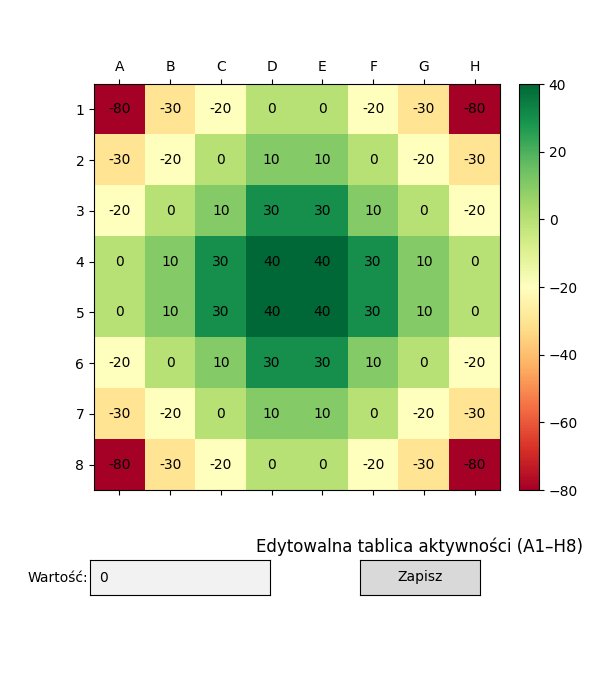

In [ ]:
from numpy import array, reshape
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, TextBox

%matplotlib widget
class EditableActivityTable:
    def __init__(self, data):
        # Dane zgodne z konwencją szachową: 0 - A1, 63 - H8
        self.data = array(data).reshape((8, 8))
        self.current_value = "0"

        self.fig, self.ax = plt.subplots(figsize=(6, 7))
        plt.subplots_adjust(bottom=0.3)

        self.ax.invert_yaxis()

        # Rysowanie planszy
        self.ax.set_xticks(range(8))
        self.ax.set_yticks(range(8))
        self.ax.set_xticklabels(['A','B','C','D','E','F','G','H'])
        self.ax.set_yticklabels(range(1, 9)) 

        self.texts = []
        self.draw_texts()

        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        axbox = plt.axes([0.15, 0.15, 0.3, 0.05])
        self.text_box = TextBox(axbox, 'Wartość:', initial=self.current_value)
        self.text_box.on_submit(self.submit_value)

        axbutton = plt.axes([0.6, 0.15, 0.2, 0.05])
        self.button = Button(axbutton, 'Zapisz')
        self.button.on_clicked(self.save_to_file)

        plt.colorbar(self.cax, fraction=0.046, pad=0.04)
        plt.title("Edytowalna tablica aktywności (A1–H8)")
        plt.ion()
        plt.show()

    def draw_texts(self):
        for txt in self.texts:
            txt.remove()
        self.texts = []
        for row in range(8):
            for col in range(8):
                val = self.data[row, col]
                txt = self.ax.text(col, 7 - row, str(val),
                                   ha='center', va='center', color='black')
                self.texts.append(txt)
        self.fig.canvas.draw_idle()

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        col = int(round(event.xdata))
        row = int(round(event.ydata))
        real_row = 7 - row
        if 0 <= real_row < 8 and 0 <= col < 8:
            try:
                val = int(self.current_value)
            except ValueError:
                print("Wartość musi być liczbą całkowitą")
                return
            self.data[real_row, col] = val
            self.cax.set_data(np.flipud(self.data))
            self.draw_texts()

    def submit_value(self, text):
        self.current_value = text

    def save_to_file(self, event):
        
        with open("tabela_aktywności.txt", "w") as f:
            for row in self.data:
                f.write(', '.join(str(v) for v in row) + ',\n')
        print("Aktualna tabela została zapisana do 'tabela_aktywności.txt'.")

pieces_table = [
-30, -40, -40, -50, -50, -40, -40, -30,
     -30, -40, -40, -50, -50, -40, -40, -30,
     -30, -40, -40, -50, -50, -40, -40, -30,
     -30, -40, -40, -50, -50, -40, -40, -30,
     -20, -30, -30, -40, -40, -30, -30, -20,
     -10, -20, -20, -20, -20, -20, -20, -10,
     20, 20, 0, 0, 0, 0, 20, 20,
     20, 30, 10, 0, 0, 10, 30, 20
]

EditableActivityTable(pieces_table)
